# This is an example of how the lockdown matrices work

## In this example, we generate an agent, and we select a number of actions based on the probability outlined in the lockdown matrix of the type "easy".

In [5]:
import sys
sys.path.append("../")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from comma.individual import Individual

In [8]:
dir_params = '../parameters_example/' # this is our folder where we store all the matrices
lockdown = 'easy' # this is the lockdown we select for this example

## Step 1: Generate an individual

#### Individuals are generated based on the parameters we have specified in the `params_individual.json`. The function `populate` will upload these info automatically, and we need to specify only how many individuals we want. Since this is an example we want only 1 agent, so we specify 1.

In [9]:
agent = Individual.populate(1, dir_params)

#### Let's visualise the agent' features:

In [10]:
agent[0].get_features()

gender                             1
pre_existing_depression            0
pre_existing_burnout               1
pre_existing_addiction             0
pre_existing_chronic_fatigue       0
parenthood                         0
living_with_child                  1
single_parent                      0
age_group__1                       1
education_High                     1
employed_No, other                 1
partnership_status_Single          1
housing_difficulties_No            1
finance_difficulties_No            1
pre_existing_health_issues_Many    1
partner_difficulties_No            1
job_type_medical_professional      1
area_rural                         1
ses_medium                         1
Name: 0, dtype: int64

#### Now, we use the function `choose_actions_on_lockdown`. This function will take as argument the type of lockdown, in this case is `easy` and it will look for the corresponding lockdown file in the folder. In this case is `lockdown_easy.csv`.

#### This function takes in the betas outlined in the `lockdown_easy.csv` file as input, and gives us as output:

#### 1) a list of length equal to the maximum number of actions of True and False
#### 2) a list of probabilities that go between 0 and 1

## Step 2: Select the actions

In [11]:
agent[0].choose_actions_on_lockdown(lockdown)

(0    False
 1     True
 2    False
 3     True
 4     True
 5     True
 6    False
 7     True
 8     True
 9     True
 dtype: bool,
 0    0.978119
 1    0.524979
 2    0.310026
 3    0.731059
 4    0.924142
 5    0.817574
 6    0.500000
 7    0.500000
 8    0.500000
 9    0.964429
 dtype: float64)

# `choose_actions_on_lockdown` explained step by step

#### Let's unpack what does happen in `choose_actions_on_lockdown`. Let's explicitly load in this notebook `lockdown_easy.csv` and take a look at the dataframe.

In [13]:
easy_df = pd.read_csv('../parameters_example/lockdown_easy.csv', sep=";")
easy_df.head()

,actions,baseline,name,gender,age,pre_existing_depression,pre_existing_burnout,pre_existing_addiction,pre_existing_chronic_fatigue,parenthood,...,partner_difficulties_Other,job_type_key_worker,job_type_medical_professional,job_type_other,job_type_white_collar,area_urban,area_rural,ses_high,ses_medium,ses_low
0,go_to_work,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.5,0.3,0.8,0.8,0,0.0,0.0
1,maintain_physical_distance,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.2,0.5,0.5,0.5,0.9,0,0.0,0.0
2,stay_at_home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.7,0.2,0.2,0,0.0,0.0
3,exercise,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0
4,socialise,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.5,0.6,0.6,1.0,1.0,0,0.0,0.0


#### The matrix specifies betas that follow a sigmoid distribution (from -5 to +5). Below the sigmoid distribution:

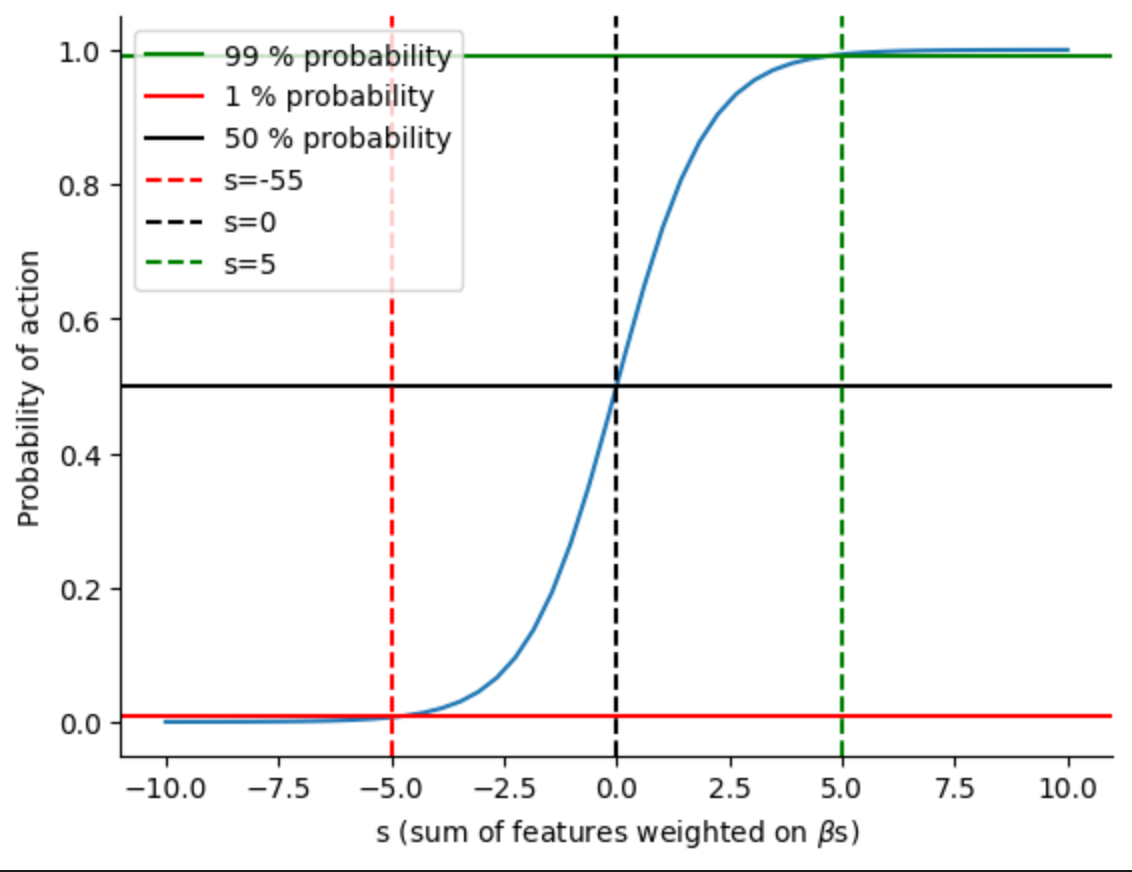 

#### - If all betas are 0, the probability of A is 0.5.
#### - When the sum of beta is roughly 5, the action is almost certain to happen (~99% probability)
#### - When the sum of beta is ~ -5, the action is almost impossible (p<1%)

### After loading tha dataframe, the function then goes on in tidying it up, and dropping the first column "actions", as we need to discard any value that is not numeric. 

In [14]:
cols = agent[0].get_features().index
easy_df['actions'] = easy_df['actions'].astype('category')

In [15]:
easy_df['actions'] = easy_df['actions'].cat.set_categories(agent[0].actions)
df = easy_df.sort_values(by='actions', ignore_index=True)

# get and sort desired columns
df = df[cols]

### At the end of this step, we have a dataframe `df` made of 10 rows (one for each action) and 19 columns (one for each agent feature).

In [18]:
df[cols].shape

(10, 19)

In [19]:
display(df)

,gender,pre_existing_depression,pre_existing_burnout,pre_existing_addiction,pre_existing_chronic_fatigue,parenthood,living_with_child,single_parent,age_group__1,education_High,"employed_No, other",partnership_status_Single,housing_difficulties_No,finance_difficulties_No,pre_existing_health_issues_Many,partner_difficulties_No,job_type_medical_professional,area_rural,ses_medium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.2,0.9,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.8


### At this point the function proceeds in doing a dot product. The dot product of two vectors is a single number that is the sum of the products of the corresponding entries of the two sequences

In [21]:
agents_features = agent[0].get_features()

### Our first vector is the vector of 0s and 1s of the agent's features:

In [22]:
agents_features

gender                             1
pre_existing_depression            0
pre_existing_burnout               1
pre_existing_addiction             0
pre_existing_chronic_fatigue       0
parenthood                         0
living_with_child                  1
single_parent                      0
age_group__1                       1
education_High                     1
employed_No, other                 1
partnership_status_Single          1
housing_difficulties_No            1
finance_difficulties_No            1
pre_existing_health_issues_Many    1
partner_difficulties_No            1
job_type_medical_professional      1
area_rural                         1
ses_medium                         1
Name: 0, dtype: int64

### Our second vector is the vector of betas of the first action (we dropped the names because we had to, but the first action was `go_to_work`).

In [23]:
df.iloc[0]

gender                             0.0
pre_existing_depression            0.0
pre_existing_burnout               0.0
pre_existing_addiction             0.0
pre_existing_chronic_fatigue       0.0
parenthood                         0.0
living_with_child                  0.0
single_parent                      0.0
age_group__1                       1.0
education_High                     1.0
employed_No, other                 0.0
partnership_status_Single          0.0
housing_difficulties_No            0.0
finance_difficulties_No            0.0
pre_existing_health_issues_Many    0.0
partner_difficulties_No            0.0
job_type_medical_professional      1.0
area_rural                         0.8
ses_medium                         0.0
Name: 0, dtype: float64

### Great. Now we take each value for each vector, we multiply them and sum the total. In python this operation is done by simply saying `.dot()`

In [25]:
dot_matrix = df.iloc[0].dot(agents_features)

### This is the result of the dot product:

In [26]:
dot_matrix

3.8

### As one can see, this number doesn't mean anything from a probability point of view. Probabilities go between 0 and 1. How do we convert this number into a probability? The sigmoid function does exactly this, so let's use it.

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [30]:
round(sigmoid(dot_matrix), 2)

0.98

### OK, so 3.8 equals to ~ 0.98 probability of going to work, for that agent that we have just simulated.

## If we want this process to be applied for all actions, we simply run this code:

In [35]:
action_probs_betas = df.dot(agents_features)

In [36]:
sigmoid_action_probs = action_probs_betas.apply(lambda x: 1 / (1 + np.exp(-x)))

In [37]:
sigmoid_action_probs

0    0.978119
1    0.524979
2    0.310026
3    0.731059
4    0.924142
5    0.817574
6    0.500000
7    0.500000
8    0.500000
9    0.964429
dtype: float64

### Now we have a vector of probabilities that go between 0 and 1, and tells us what are the chances of taking each action for that specific agent (recall that each row is an action)

## However, what we do with this probability? in the end we need to know if the person is going to do it or not. This is a binary decision. To do that, we are going to launch a coin as many times as there are actions (i.e., `n_actions`). The chances of getting heads/True or tail/False are then tweaked based on the probabilities computed above:

In [49]:
n_actions = df.shape[0]
np.random.rand(n_actions) <= sigmoid_action_probs

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9     True
dtype: bool

### Every time the vector is true it means that the agent will do that action.

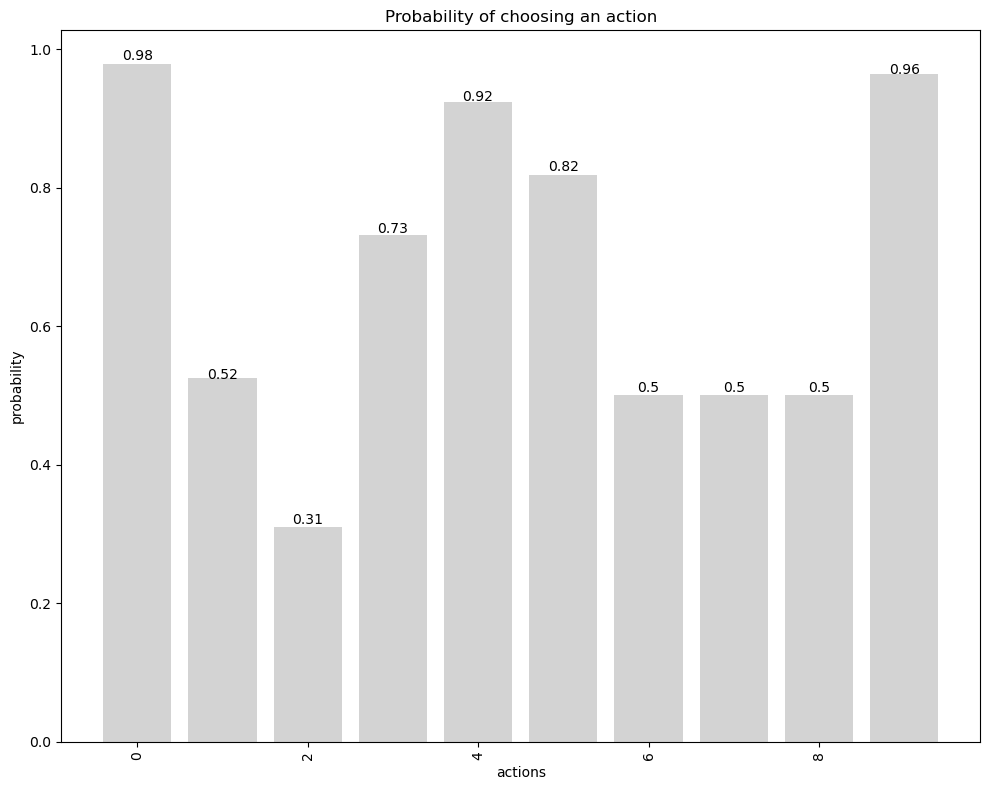

In [52]:
data = {
    'Category': sigmoid_action_probs.index.values,
    'Value': sigmoid_action_probs.values
}

df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10,8))
bars = plt.bar(df['Category'], df['Value'], color='lightgray')

# Add the data value on top of each bar
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Rotate the x labels so they don't overlap
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('actions')
plt.ylabel('probability')
plt.title('Probability of choosing an action')

# Show the plot
plt.tight_layout()
plt.show()
